In [26]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm



%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


In [41]:
music_data = pd.read_excel('data/midterm-exam-data.xlsx', sheet_name='Music',header=0)
rat_data = pd.read_excel('data/midterm-exam-data.xlsx', sheet_name='Rat',header=0)
eye_data = pd.read_excel('data/midterm-exam-data.xlsx', sheet_name='EyeFocus',header=0)

In [28]:
tensile_df = pd.DataFrame(data={'Mile':[17.9, 16.5,16.4,16.8,18.8,15.5,17.5,16.4,15.9,18.3], 
                                'W':[1.35,1.9,1.7,1.8,1.3,2.05,1.6,1.8,1.85,1.4],
                               'Temp': [90,30,80,40,35,45,50,60,65,30]})
tensile_df['Mile'].mean()

17.0

In [29]:
from statsmodels.formula.api import ols

formula = 'Mile ~ W + Temp'
ols(formula, data=tensile_df).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.983   
Dependent Variable: Mile             AIC:                -8.2833 
Date:               2021-09-30 11:38 BIC:                -7.3755 
No. Observations:   10               Log-Likelihood:     7.1416  
Df Model:           2                F-statistic:        257.3   
Df Residuals:       7                Prob (F-statistic): 2.80e-07
R-squared:          0.987            Scale:              0.020050
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    24.7489    0.3489   70.9376  0.0000  23.9239  25.5738
W            -4.1593    0.1867  -22.2775  0.0000  -4.6008  -3.7178
Temp         -0.0149    0.0023   -6.5453  0.0003  -0.0203  -0.0095
-----------------------------------------------------------------
Omnibus:               1.602        Durbin-Watson:          1.503
Prob(Omnibus):         0.449        Jarque-Bera (JB):       0.843
Skew:                  -0.292       Prob(JB):               0.656
Kurtosis:              1.703        Condition No.:          490  
=================================================================

"""

In [30]:
rat_data

,Ethanol,SleepTime
0,Control,88.6
1,1gkg,63.0
2,2gkg,44.9
3,4gkg,31.0
4,Control,73.2
5,1gkg,53.9
6,2gkg,59.5
7,4gkg,39.6
8,Control,91.4
9,1gkg,69.2


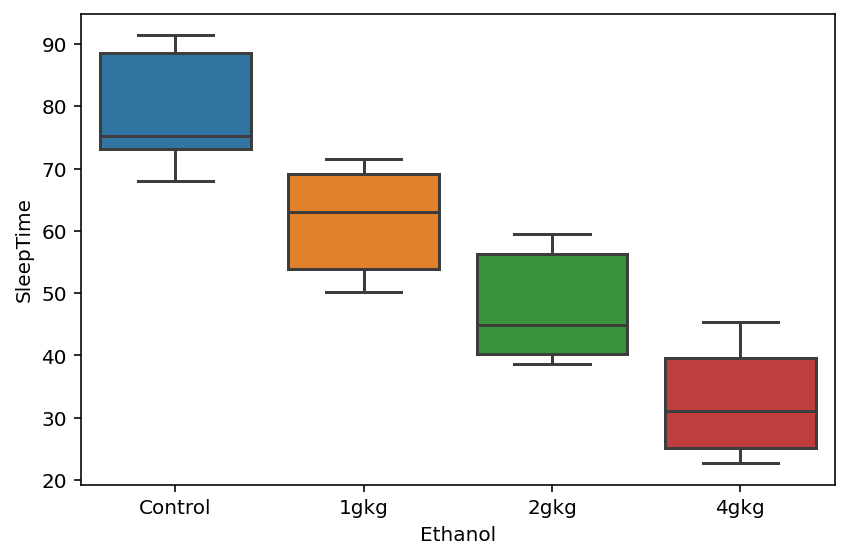

In [31]:
# box plot
from statsmodels.formula.api import ols # Require patsy version 5.0.1+
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(6,4));
sns.boxplot(x='Ethanol',y='SleepTime',data=rat_data) #ดูคร่าวๆว่าค่า mean ในแต่ละกลุ่มแตกต่างกันไหมจากความยาวกล่องที่ ทับซ้อน (overlap) กัน
plt.tight_layout()
pass;

In [32]:
rat_app_model = ols('SleepTime ~ Ethanol', data=rat_data).fit()
aov_table = sm.stats.anova_lm(rat_app_model, typ=1) 
aov_table 

,df,sum_sq,mean_sq,F,PR(>F)
Ethanol,3.0,5882.3575,1960.785833,21.092224,0.000008
Residual,16.0,1487.4000,92.962500,NaN,NaN


In [33]:
rat_app_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS               Adj. R-squared:      0.760   
Dependent Variable:   SleepTime         AIC:                 150.9386
Date:                 2021-09-30 11:38  BIC:                 154.9215
No. Observations:     20                Log-Likelihood:      -71.469 
Df Model:             3                 F-statistic:         21.09   
Df Residuals:         16                Prob (F-statistic):  8.32e-06
R-squared:            0.798             Scale:               92.962  
---------------------------------------------------------------------
                    Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
---------------------------------------------------------------------
Intercept           61.5400   4.3119 14.2721 0.0000  52.3992  70.6808
Ethanol[T.2gkg]    -13.6200   6.0980 -2.2335 0.0401 -26.5471  -0.6929
Ethanol[T.4gkg]    -28.7800   6.0980 -4.7196 0.0002 -41.7071 -15.8529
Ethanol[T.Control]  17.7400   6.0980  2.9092 0.0102   4.8129  30.6671
---------------------------------------------------------------------
Omnibus:               11.465         Durbin-Watson:            2.006
Prob(Omnibus):         0.003          Jarque-Bera (JB):         2.217
Skew:                  0.161          Prob(JB):                 0.330
Kurtosis:              1.401          Condition No.:            5    
=====================================================================

"""

In [34]:
def check_anova_normality(group, x): ###ใส่ group = treatment หลายๆอัน, ค่า residual (model.resid)  

    T = len(x)
    
    fig = plt.figure(figsize=(10,8))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    #ax1.plot(x, color='blue', alpha=0.5, linestyle='--', marker='o', ms=4)
    n=len(x)
    sns.residplot(np.linspace(1,n,n), x, color='blue', ax=ax1)
    ax1.set_title('Sequence plot')
    
    # Scatter plot
    #ax2.scatter(x, x.shift(), alpha=0.5, color='red')
    #ax2.set_title(r'Scatter plot of $e_n$ vs $e_{n+1}$')
    
    # Residual groupplot
    resid_df = pd.DataFrame({'Group':group, 'Resid':x})
    sns.stripplot(x='Group', y='Resid', data=resid_df, ax=ax2) 
    ax2.set_title('Residuals by treatments')
    
    # Box plot
    #ax2.boxplot(x,showmeans=True)
    #ax2.set_title('Boxplot')

    # histogram plot
    sns.distplot(x, hist=True, kde=True, ax=ax3)
    ax3.set_title('Histogram')

    # qq plot
    sm.graphics.qqplot(x,line='q',ax=ax4)
    ax4.set_title('Normal plot')
    plt.tight_layout()

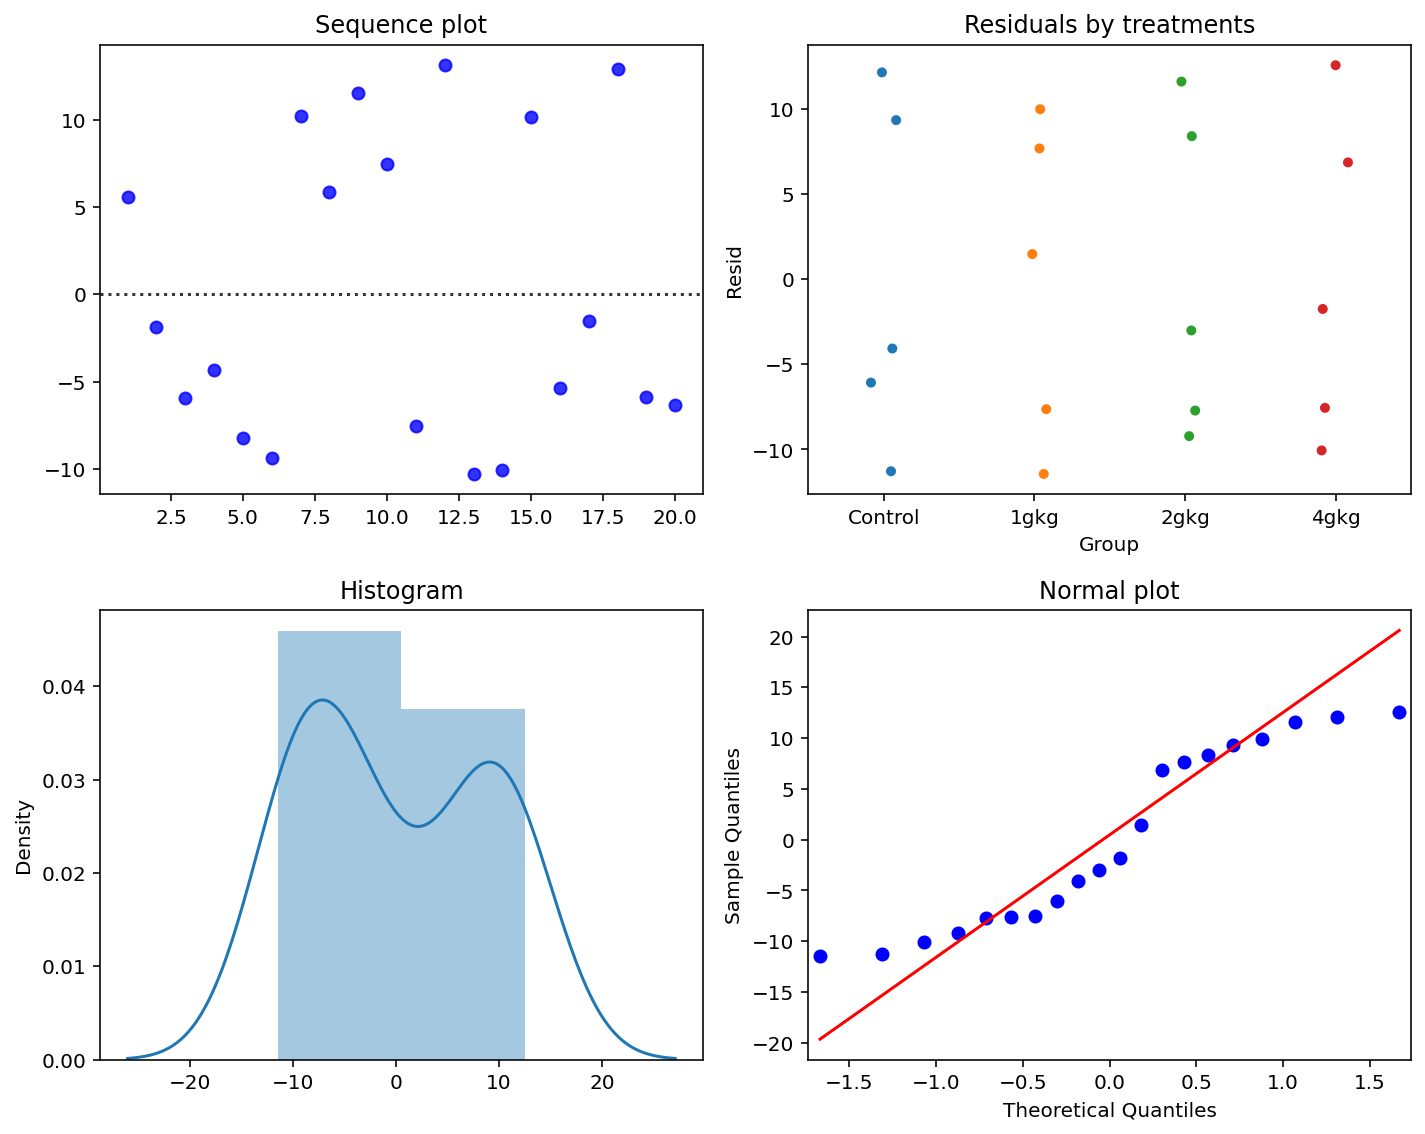

In [35]:
check_anova_normality(rat_data['Ethanol'], rat_app_model.resid)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2 meandiff p-adj   lower    upper   reject
-------------------------------------------------------
  1gkg    2gkg   -13.62 0.1564 -31.0677   3.8277  False
  1gkg    4gkg   -28.78 0.0012 -46.2277 -11.3323   True
  1gkg Control    17.74 0.0456   0.2923  35.1877   True
  2gkg    4gkg   -15.16 0.1006 -32.6077   2.2877  False
  2gkg Control    31.36  0.001  13.9123  48.8077   True
  4gkg Control    46.52  0.001  29.0723  63.9677   True
-------------------------------------------------------


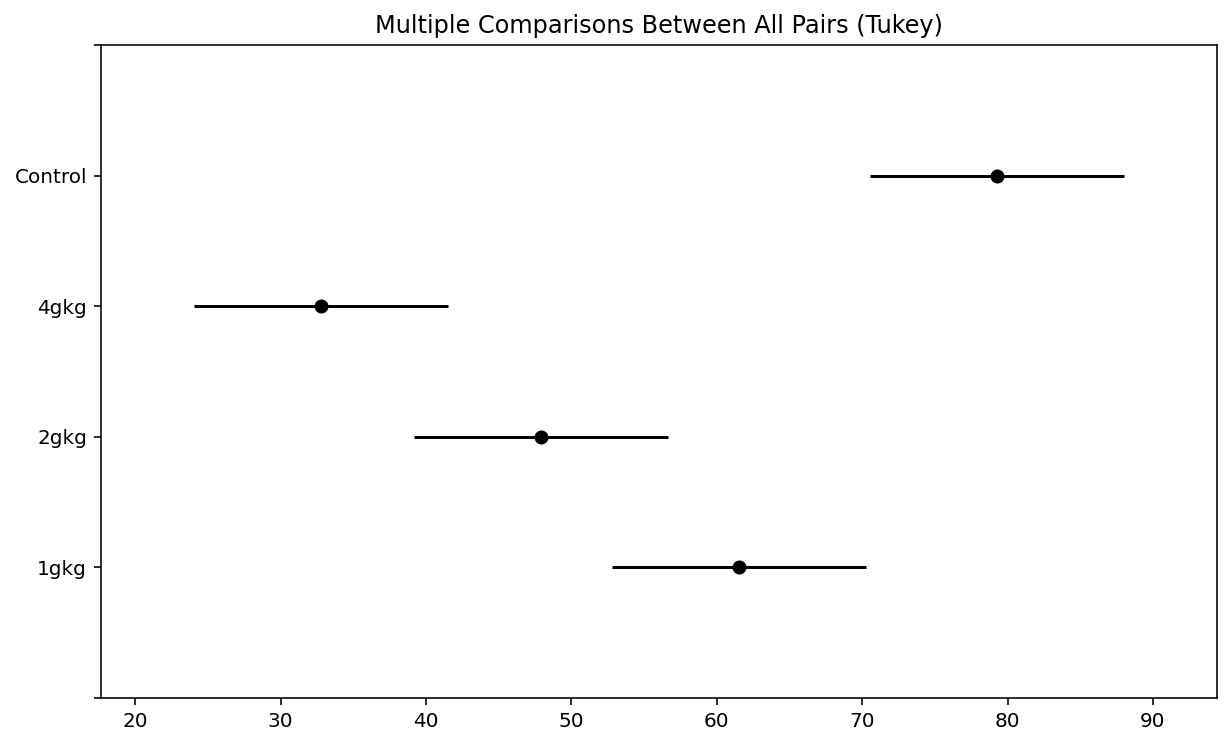

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# alpha = Family-wise error rate
result=pairwise_tukeyhsd(rat_data['SleepTime'],rat_data['Ethanol'],alpha=0.05)
print(result)
result.plot_simultaneous();

In [42]:
eye_data

,Distance,Subject,Time
0,4m,A,10
1,6m,A,7
2,8m,A,5
3,10m,A,6
4,4m,B,6
5,6m,B,6
6,8m,B,3
7,10m,B,4
8,4m,C,6
9,6m,C,6


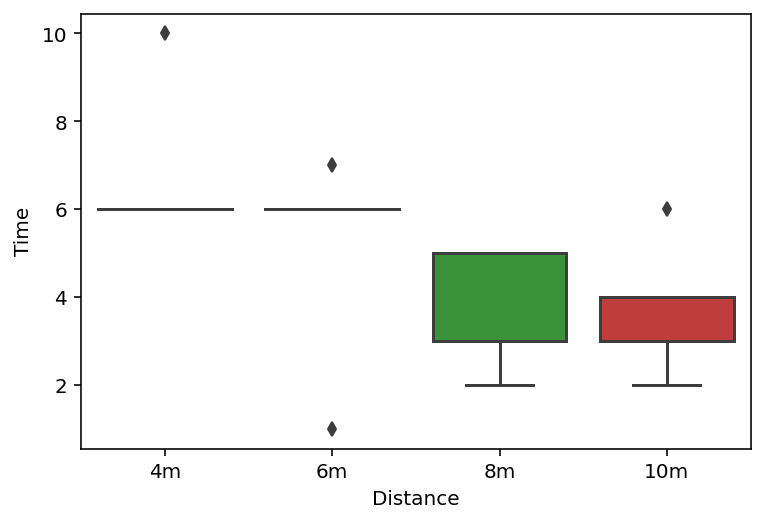

In [43]:
# box plot
from statsmodels.formula.api import ols # Require patsy version 5.0.1+
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Distance',y='Time',data=eye_data);

In [44]:
# software calculation
from statsmodels.formula.api import ols # Require patsy version 5.0.1+ 
from statsmodels.stats.anova import anova_lm

mod = ols('Time ~ Distance + Subject', eye_data).fit()
anova_table = sm.stats.anova_lm(mod)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Distance,3.0,32.95,10.983333,8.614379,0.002543
Subject,4.0,36.30,9.075000,7.117647,0.003548
Residual,12.0,15.30,1.275000,NaN,NaN


In [45]:
phos_app_model = ols('Time ~ Distance', data=eye_data).fit()
aov_table = sm.stats.anova_lm(phos_app_model, typ=1) 
aov_table 

,df,sum_sq,mean_sq,F,PR(>F)
Distance,3.0,32.95,10.983333,3.405685,0.043367
Residual,16.0,51.60,3.225000,NaN,NaN


In [19]:
music_data

,Productivity,Week,Day,Tempo
0,18,1,Mon,D
1,13,2,Mon,C
2,7,3,Mon,A
3,17,4,Mon,E
4,21,5,Mon,B
5,17,1,Tue,C
6,34,2,Tue,B
7,29,3,Tue,D
8,13,4,Tue,A
9,26,5,Tue,E


In [26]:
ReactionTime_model = ols('Productivity ~  Tempo + Week + Day', data=music_data).fit()
aov_table2 = sm.stats.anova_lm(ReactionTime_model, typ=1) 
aov_table2

,df,sum_sq,mean_sq,F,PR(>F)
Tempo,4.0,664.40,166.100000,12.409104,0.000118
Day,4.0,477.20,119.300000,8.912740,0.000683
Week,1.0,69.62,69.620000,5.201215,0.037605
Residual,15.0,200.78,13.385333,NaN,NaN


In [25]:
total_y = sum(music_data.Productivity)
SST = sum(music_data.Productivity**2) - (total_y**2)/25

# Compute SS terms
y_dot_j_dot = music_data.groupby('Tempo').aggregate({'Productivity':'sum'}).Productivity
SSTr = sum(y_dot_j_dot**2)/5 - (total_y**2)/25
print(SSTr)

664.3999999999996
